In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from scipy import stats as stats
from scipy.stats import norm

%matplotlib inline

In [ ]:
# References:
# https://www.kaggle.com/ysidhu/two-sigma-portfolio-returns-eda
# 

In [2]:
with pd.HDFStore("./data/train.h5", "r") as train:
    df = train.get("train")

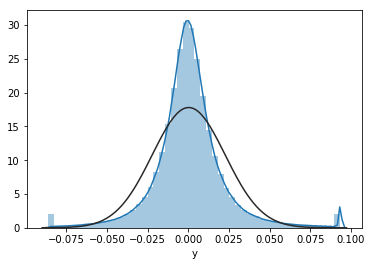

In [3]:
sns.distplot(df.y,fit=norm)

In [5]:
_, p_value = stats.jarque_bera(df.y)
print("p-value: {}".format(p_value))

p-value: 0.0


In [22]:
print("# of unique IDs {}".format(len(df.id.unique())))
print("# of unique timestamps: {}".format(len(df.timestamp.unique())))
# Per the competition details we dont the frequeny of the time stamps...(min,hr,days,weeks,etc)

# of unique IDs 1424
# of unique timestamps: 1813


In [21]:
df.head()


,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [24]:
# Define market as the aggregate of the unique ids
market_df = df[['timestamp', 'y']].groupby('timestamp').agg([np.mean, np.std, len]).reset_index()
market_df.head(20)

timestamp         y                 
                  mean       std    len
0          0 -0.001870  0.026646  750.0
1          1  0.000501  0.028422  750.0
2          2 -0.005787  0.029281  750.0
3          3  0.001633  0.025333  750.0
4          4 -0.004309  0.035929  750.0
5          5  0.003748  0.026039  750.0
6          6 -0.006660  0.030439  750.0
7          7 -0.003568  0.026570  750.0
8          8  0.005308  0.032614  750.0
9          9  0.004594  0.031162  750.0
10        10 -0.004571  0.033192  750.0
11        11 -0.005756  0.040687  750.0
12        12 -0.009692  0.028658  749.0
13        13  0.000340  0.031947  749.0
14        14  0.000786  0.030992  749.0
15        15  0.000451  0.030164  749.0
16        16 -0.005787  0.032831  748.0
17        17 -0.005068  0.031676  748.0
18        18  0.000135  0.033130  747.0
19        19  0.010532  0.040005  747.0

Text(0,0.5,'portfolio size')

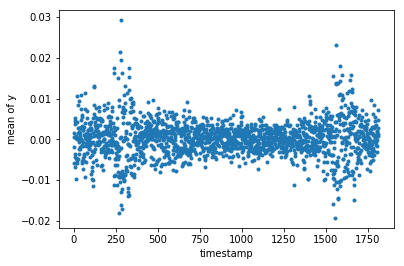

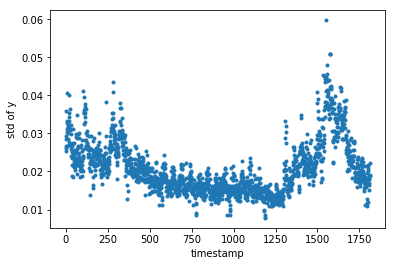

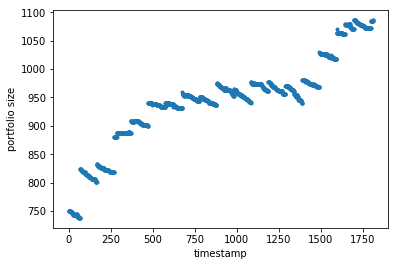

In [27]:
t      = market_df['timestamp']
y_mean = np.array(market_df['y']['mean'])
y_std  = np.array(market_df['y']['std'])
n      = np.array(market_df['y']['len'])

plt.figure()
plt.plot(t, y_mean, '.')
plt.xlabel('timestamp')
plt.ylabel('mean of y')

plt.figure()
plt.plot(t, y_std, '.')
plt.xlabel('timestamp')
plt.ylabel('std of y')

plt.figure()
plt.plot(t, n, '.')
plt.xlabel('timestamp')
plt.ylabel('portfolio size')

In [28]:
simple_ret = y_mean # this is a vector of the mean of asset returns for each timestamp
cum_ret = np.log(1+simple_ret).cumsum()

In [29]:
portfolio_mean = np.mean(cum_ret)
portfolio_std = np.std(cum_ret)
print("portfolio mean periodic return: " + str(portfolio_mean))
print("portfolio std dev of periodic returns: " + str(portfolio_std))

portfolio mean periodic return: 0.183126
portfolio std dev of periodic returns: 0.0922067


Text(0,0.5,'portfolio value')

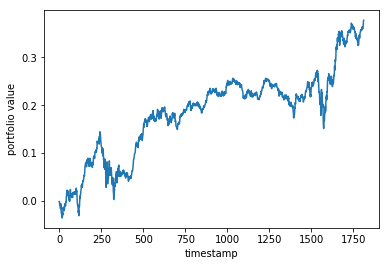

In [30]:
plt.figure()
plt.plot(t, cum_ret)
plt.xlabel('timestamp')
plt.ylabel('portfolio value')